In [1]:
from theano.sandbox import cuda

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [18]:
import os, sys
current_dir = os.getcwd()

In [34]:
data_dir = current_dir+'/data/statefarm/'
sample_data_dir = current_dir + '/data/statefarm/sample/'

In [21]:
%matplotlib inline
from __future__ import print_function, division
# import utils; reload(utils)
from utils import *
from IPython.display import FileLink

In [22]:
batch_size = 64

In [23]:
%cd data/statefarm

/home/ubuntu/nbs/data/statefarm


In [24]:
%cd train

/home/ubuntu/nbs/data/statefarm/train


In [6]:
%mkdir ../valid

for d in glob('c?'):
    os.mkdir('../valid/'+d)

In [12]:
%mkdir ../sample
%mkdir ../sample/train
%mkdir ../sample/valid

In [25]:
g = glob('c?/*.jpg')
shuf = np.random.permutation(g)
for i in range(2000):
    os.rename(shuf[i], data_dir +'valid/'+shuf[i])

In [6]:
%mkdir ../sample
%mkdir ../sample/train
%mkdir ../sample/valid

In [26]:
for d in glob('c?'):
    os.mkdir('../sample/train/'+d)
    os.mkdir('../sample/valid/'+d)

In [27]:
from shutil import copyfile

In [28]:
# Copying files to sample folder so there can be some sample data to perform tests on.
g = glob('c?/*.jpg')
shuf = np.random.permutation(g)
for i in range(1500):
    copyfile(shuf[i], '../sample/train/' + shuf[i])

In [29]:
%cd ../valid

/home/ubuntu/nbs/data/statefarm/valid


In [31]:
g = glob('c?/*.jpg')
shuf = np.random.permutation(g)
for i in range(1000):
    copyfile(shuf[i], '../sample/valid/' + shuf[i])

In [40]:
batches = get_batches(sample_data_dir+'train', batch_size=batch_size)
val_batches = get_batches(sample_data_dir+'valid', batch_size=batch_size*2, shuffle=False)

Found 1500 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [36]:
(val_classes, trn_classes, val_labels, trn_labels, val_filenames, filenames, test_filename) = get_classes(sample_data_dir)

Found 1500 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 0 images belonging to 0 classes.


In [37]:
# Linear model
model = Sequential([
        BatchNormalization(axis=1, input_shape=(3,224,224)),
        Flatten(),
        Dense(10, activation='softmax')
    ])

In [41]:
model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(batches, batches.nb_sample, nb_epoch=2, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/2
1500/1500 [==============================] - 32s - loss: 13.5462 - acc: 0.1173 - val_loss: 13.4586 - val_acc: 0.1630
Epoch 2/2
1500/1500 [==============================] - 24s - loss: 13.6889 - acc: 0.1440 - val_loss: 13.6292 - val_acc: 0.1510


In [42]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_1 (BatchNormal(None, 3, 224, 224)   6           batchnormalization_input_1[0][0] 
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 150528)        0           batchnormalization_1[0][0]       
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 10)            1505290     flatten_1[0][0]                  
Total params: 1505296
____________________________________________________________________________________________________


In [43]:
# A numpy array of predcitions is yielded.
# predict_generator generates predictions for the input samples from a data generator.
np.round(model.predict_generator(batches, batches.N)[:10], 2)

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [45]:
model = Sequential([
        BatchNormalization(axis=1, input_shape=(3,224,224)),
        Flatten(),
        Dense(10, activation='softmax')
    ])

model.compile(Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
# Fits model on data generated batch by batch by a Python generator. The generator is run in parallel to the model for efficiency
# For instance, it allows to deal with realtime data augmentation
model.fit_generator(batches, batches.nb_sample, nb_epoch=2, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/2
1500/1500 [==============================] - 32s - loss: 2.4766 - acc: 0.1740 - val_loss: 4.2046 - val_acc: 0.1840
Epoch 2/2
1500/1500 [==============================] - 27s - loss: 1.7927 - acc: 0.3987 - val_loss: 2.7652 - val_acc: 0.2760


In [46]:
model.optimizer.lr = 0.001

In [48]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=2, validation_data = val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/2
1500/1500 [==============================] - 31s - loss: 0.7403 - acc: 0.8580 - val_loss: 0.9689 - val_acc: 0.7210
Epoch 2/2
1500/1500 [==============================] - 24s - loss: 0.6733 - acc: 0.8720 - val_loss: 0.8723 - val_acc: 0.7620


In [50]:
rnd_batches = get_batches(sample_data_dir+'valid', batch_size=batch_size*2, shuffle=True)

Found 1000 images belonging to 10 classes.


In [51]:
val_res = [model.evaluate_generator(rnd_batches, rnd_batches.nb_sample) for i in range(10)]
np.round(val_res, 2)

array([[ 0.87,  0.76],
       [ 0.86,  0.76],
       [ 0.88,  0.75],
       [ 0.88,  0.76],
       [ 0.88,  0.76],
       [ 0.87,  0.76],
       [ 0.86,  0.77],
       [ 0.89,  0.76],
       [ 0.87,  0.76],
       [ 0.89,  0.75]])

In [53]:
# The above model is overfitting. Overfitting can be reduced by adding l2 regularization.

model = Sequential([
        BatchNormalization(axis=1, input_shape=(3,224,224)),
        Flatten(),
        Dense(10, activation='softmax', W_regularizer=l2(0.01))
    ])

model.compile(Adam(lr=10e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(batches, batches.nb_sample, nb_epoch=2, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/2
1500/1500 [==============================] - 31s - loss: 4.6428 - acc: 0.2893 - val_loss: 6.8254 - val_acc: 0.3140
Epoch 2/2
1500/1500 [==============================] - 23s - loss: 2.5710 - acc: 0.5927 - val_loss: 3.8190 - val_acc: 0.5090


In [54]:
model.optimizer.lr = 0.001
model.fit_generator(batches, batches.nb_sample, nb_epoch=2, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/2
1500/1500 [==============================] - 32s - loss: 2.0031 - acc: 0.7380 - val_loss: 3.6045 - val_acc: 0.5060
Epoch 2/2
1500/1500 [==============================] - 23s - loss: 1.6937 - acc: 0.8360 - val_loss: 2.3090 - val_acc: 0.7110


In [81]:
# Strong prediction of the person talking on the phone on the left hand side
np.round(model.predict_generator(val_batches, val_batches.N)[500], 2)

array([ 0.03,  0.02,  0.26,  0.  ,  0.63,  0.  ,  0.03,  0.  ,  0.03,  0.  ], dtype=float32)

In [57]:
# In order to plot the images, I need to call get_data
val = get_data(sample_data_dir+'valid')

Found 1000 images belonging to 10 classes.


In [79]:
# The filename of the 500th file is
val_filenames[500]

'c4/img_51813.jpg'

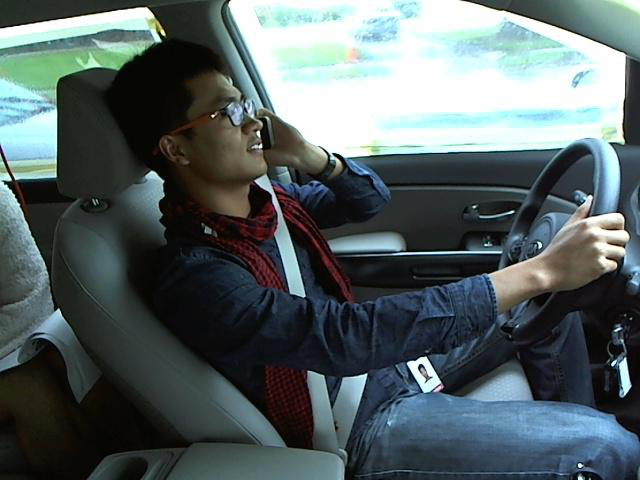

In [80]:
from PIL import Image
# As visible, even this sample model has correctly predicted the 
# action of this driver.
Image.open(sample_data_dir+'valid/'+val_filenames[500])

In [82]:
# Single hidden layer
model = Sequential([
        BatchNormalization(axis=1, input_shape=(3,224,224)),
        Flatten(),
        Dense(100, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])

In [83]:
model.compile(Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(batches, batches.nb_sample, nb_epoch=2, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/2
1500/1500 [==============================] - 33s - loss: 2.0227 - acc: 0.3440 - val_loss: 5.1552 - val_acc: 0.3520
Epoch 2/2
1500/1500 [==============================] - 24s - loss: 1.0897 - acc: 0.6913 - val_loss: 2.5771 - val_acc: 0.4760


In [84]:
model.optimizer.lr = 0.01
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/5
1500/1500 [==============================] - 32s - loss: 0.6380 - acc: 0.8553 - val_loss: 1.2064 - val_acc: 0.6510
Epoch 2/5
1500/1500 [==============================] - 23s - loss: 0.4433 - acc: 0.9200 - val_loss: 0.8512 - val_acc: 0.7620
Epoch 3/5
1500/1500 [==============================] - 24s - loss: 0.2910 - acc: 0.9627 - val_loss: 0.7186 - val_acc: 0.8130
Epoch 4/5
1500/1500 [==============================] - 24s - loss: 0.1866 - acc: 0.9940 - val_loss: 0.5711 - val_acc: 0.8880
Epoch 5/5
1500/1500 [==============================] - 24s - loss: 0.1350 - acc: 0.9973 - val_loss: 0.5188 - val_acc: 0.9010


In [86]:
type(batches)

keras.preprocessing.image.DirectoryIterator

In [89]:
# Applying a convolutional model.
def conv(batches):
    model = Sequential([
            BatchNormalization(axis=1, input_shape=(3,224,224)),
            Convolution2D(32,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Flatten(),
            Dense(200, activation='relu'),
            BatchNormalization(),
            Dense(10, activation='softmax')
        ])
    model.compile(Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit_generator(batches, batches.nb_sample, nb_epoch=2, validation_data= val_batches, nb_val_samples=val_batches.nb_sample)
    
    model.optimizer.lr = 0.001
    model.fit_generator(batches, batches.nb_sample, nb_epoch=4, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
    
    return model

In [90]:
# This network in just 4 epochs reaches a very high training accuracy
# Which signifies that data needs to be regularized.
conv(batches)

Epoch 1/2
1500/1500 [==============================] - 32s - loss: 1.4746 - acc: 0.5593 - val_loss: 2.0102 - val_acc: 0.2670
Epoch 2/2
1500/1500 [==============================] - 26s - loss: 0.3655 - acc: 0.9227 - val_loss: 2.0912 - val_acc: 0.2560
Epoch 1/4
1500/1500 [==============================] - 34s - loss: 0.0961 - acc: 0.9933 - val_loss: 2.7992 - val_acc: 0.1080
Epoch 2/4
1500/1500 [==============================] - 33s - loss: 0.0446 - acc: 0.9980 - val_loss: 3.2905 - val_acc: 0.1070
Epoch 3/4
1500/1500 [==============================] - 28s - loss: 0.0214 - acc: 1.0000 - val_loss: 3.5317 - val_acc: 0.1070
Epoch 4/4
1500/1500 [==============================] - 26s - loss: 0.0137 - acc: 1.0000 - val_loss: 3.6879 - val_acc: 0.1070


In [91]:
# width shift moves images randomly to the left/right.
gen_t = image.ImageDataGenerator(width_shift_range=0.1)
batches = get_batches(sample_data_dir+'train', gen_t, batch_size=batch_size)

Found 1500 images belonging to 10 classes.


In [93]:
# This model does quite poorly as the val accuracy stops improving down at 0.1070
model = conv(batches)

Epoch 1/2
1500/1500 [==============================] - 32s - loss: 2.2660 - acc: 0.2973 - val_loss: 1.9637 - val_acc: 0.3560
Epoch 2/2
1500/1500 [==============================] - 29s - loss: 1.2662 - acc: 0.5980 - val_loss: 2.5387 - val_acc: 0.1070
Epoch 1/4
1500/1500 [==============================] - 36s - loss: 0.8084 - acc: 0.7633 - val_loss: 3.2834 - val_acc: 0.1070
Epoch 2/4
1500/1500 [==============================] - 26s - loss: 0.6631 - acc: 0.8133 - val_loss: 3.8046 - val_acc: 0.1070
Epoch 3/4
1500/1500 [==============================] - 27s - loss: 0.5020 - acc: 0.8653 - val_loss: 4.1223 - val_acc: 0.1070
Epoch 4/4
1500/1500 [==============================] - 28s - loss: 0.3948 - acc: 0.9027 - val_loss: 4.1080 - val_acc: 0.1070


In [94]:
# Applying a host of data augmentation to the dataset to see if there is any improvement
gen_t = image.ImageDataGenerator(rotation_range=15, height_shift_range=0.05, shear_range=0.1, channel_shift_range=20, width_shift_range=0.1)
batches = get_batches(sample_data_dir+'train', gen_t, batch_size=batch_size)

Found 1500 images belonging to 10 classes.


In [95]:
# No improvement is being shown, so next step is to lower the learning rate and run the model for more epochs
model = conv(batches)

Epoch 1/2
1500/1500 [==============================] - 34s - loss: 2.5362 - acc: 0.2133 - val_loss: 2.3341 - val_acc: 0.2100
Epoch 2/2
1500/1500 [==============================] - 31s - loss: 1.7872 - acc: 0.4213 - val_loss: 2.0315 - val_acc: 0.2980
Epoch 1/4
1500/1500 [==============================] - 35s - loss: 1.5178 - acc: 0.5047 - val_loss: 2.2170 - val_acc: 0.1180
Epoch 2/4
1500/1500 [==============================] - 30s - loss: 1.4278 - acc: 0.5400 - val_loss: 2.2085 - val_acc: 0.1120
Epoch 3/4
1500/1500 [==============================] - 29s - loss: 1.2587 - acc: 0.5880 - val_loss: 2.1617 - val_acc: 0.1410
Epoch 4/4
1500/1500 [==============================] - 30s - loss: 1.1594 - acc: 0.6347 - val_loss: 2.1083 - val_acc: 0.1570


In [96]:
# Seeing some improvements. Will run for more epochs
model.optimizer.lr = 0.0001
model.fit_generator(batches, batches.nb_sample, nb_epoch=5, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/5
1500/1500 [==============================] - 36s - loss: 1.0839 - acc: 0.6607 - val_loss: 1.9690 - val_acc: 0.1950
Epoch 2/5
1500/1500 [==============================] - 27s - loss: 1.0329 - acc: 0.6633 - val_loss: 1.8807 - val_acc: 0.2290
Epoch 3/5
1500/1500 [==============================] - 28s - loss: 0.9598 - acc: 0.7087 - val_loss: 1.8327 - val_acc: 0.2920
Epoch 4/5
1500/1500 [==============================] - 27s - loss: 0.9034 - acc: 0.7080 - val_loss: 1.7450 - val_acc: 0.3420
Epoch 5/5
1500/1500 [==============================] - 26s - loss: 0.8916 - acc: 0.7147 - val_loss: 1.6263 - val_acc: 0.3770


In [97]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=10, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/10
1500/1500 [==============================] - 37s - loss: 0.8214 - acc: 0.7413 - val_loss: 1.4062 - val_acc: 0.4590
Epoch 2/10
1500/1500 [==============================] - 26s - loss: 0.7699 - acc: 0.7607 - val_loss: 1.2399 - val_acc: 0.5650
Epoch 3/10
1500/1500 [==============================] - 27s - loss: 0.7573 - acc: 0.7627 - val_loss: 1.1501 - val_acc: 0.6040
Epoch 4/10
1500/1500 [==============================] - 27s - loss: 0.7079 - acc: 0.7747 - val_loss: 1.0718 - val_acc: 0.6710
Epoch 5/10
1500/1500 [==============================] - 29s - loss: 0.7197 - acc: 0.7640 - val_loss: 0.8776 - val_acc: 0.7610
Epoch 6/10
1500/1500 [==============================] - 29s - loss: 0.6661 - acc: 0.7847 - val_loss: 0.7448 - val_acc: 0.7950
Epoch 7/10
1500/1500 [==============================] - 28s - loss: 0.6420 - acc: 0.8013 - val_loss: 0.7681 - val_acc: 0.7750
Epoch 8/10
1500/1500 [==============================] - 30s - loss: 0.6228 - acc: 0.8120 - val_loss: 0.7264 - val_acc:

In [98]:
model.save_weights(sample_data_dir+'models/sample1.h5')

In [ ]:
def do_